**Introduction**

The Dataset belongs to Indian logistics and supply chain company which provide delivery services to a number of e-commerce companies. Since the data is at the segment level, each row represents a single segment with its own source, destination, distance, and time. Additionally, it has an open source route engine time and distance calculator that determines the quickest route taking into account traffic and other uncontrollable variables. There are two types of routes, which indicate how shipments will be transported. Since there are no additional stops along the road for pickups or drops, truck loads are employed for longer distances. Shorter distances are covered by carting.

**Problem Statement**

Performing Univariate and Bi-Variate analysis to understand what factors like route type, source, destination are playing major role in increasing/ decreasing actual and segment time. Also extract features like city, states, day, month and check if those are affecting actual time. Find Outliers and missing values and way to handle them.

**Importing Required Libraries**

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import kstest
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from termcolor import colored

In [ ]:
df=pd.read_csv("data.csv")
df.head()
# output is hidden due to organization policy and to manitain confidentiality

**Basics Metrics**

In [105]:
#shape of the dataset
print("Total no. of rows->",df.shape[0])

Total no. of rows-> 144867


In [106]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

Few columns like source center, source name, destination center, destination name, route type are of object type where as columns like actual time, actual distance, segment times, segment distance are of numerical type.

In [108]:
#checking null values
round((df.isnull().sum()/len(df))*100,2)

data                              0.00
trip_creation_time                0.00
route_schedule_uuid               0.00
route_type                        0.00
trip_uuid                         0.00
source_center                     0.00
source_name                       0.20
destination_center                0.00
destination_name                  0.18
od_start_time                     0.00
od_end_time                       0.00
start_scan_to_end_scan            0.00
is_cutoff                         0.00
cutoff_factor                     0.00
cutoff_timestamp                  0.00
actual_distance_to_destination    0.00
actual_time                       0.00
osrm_time                         0.00
osrm_distance                     0.00
factor                            0.00
segment_actual_time               0.00
segment_osrm_time                 0.00
segment_osrm_distance             0.00
segment_factor                    0.00
dtype: float64

source_center and destination name has some missing values but percentage is very less so these can be dropped.

In [109]:
#checking for duplicated rows
np.any(df.duplicated())

False

There are no duplicated rows in dataset

In [110]:
df.describe(include="object")

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


**Observations:**

1. There are 2 types of unique data available of which training occurs 104858 times.
2. There are 2 types of unique route type available of which FTL occurs 99660 times.
3. There are 1508 unique source center with occurance of "IND000000ACB" 23347 times which have source Gurgaon, Haryana state with 1498 times that depicts source center have some null values.
4. There are 1481 unique destination center with occurance of "IND000000ACB" 15192 times which have destination Gurgaon, Haryana state with 1468 times that depicts destination center have some null values.

In [111]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


**Observations:**

1. start to end time has mean value of 961 minutes with minimum time of 20 minutes and max of 7898. As max time is much larger than 75th percentile and standard deviation is also higher so it may have outliers.
2. source to destination distance has mean value of 234 km with minimum dist of 9km and max of 1927. As max distance is much larger than 75th percentile and standard deviation is also higher so it may have outliers.
3. actual time has mean value of 416 minutes with minimum time of 9 minutes and max of 4532. As max distance is much larger than 75th percentile and standard deviation is also higher so it may have outliers.
4. The above pattern can be observed for all numerical columns so outliers may be present for all numerical variables.

In [112]:
col_list=["data","route_type","source_name","destination_name"]

def value_check(df,col):
  print(colored("Unique Values:", color="blue",attrs=["bold"]))
  print(df[col].unique())
  print(colored("Value Counts:", color="blue",attrs=["bold"]))
  print(round(df[col].value_counts(normalize=True)*100,2))
for col in col_list:
  print(colored(str(col)+"-", color="red",attrs=["bold","underline"]))
  value_check(df,col)
  print("\n")
  print("-"*50)

data-
Unique Values:
['training' 'test']
Value Counts:
training    72.38
test        27.62
Name: data, dtype: float64


--------------------------------------------------
route_type-
Unique Values:
['Carting' 'FTL']
Value Counts:
FTL        68.79
Carting    31.21
Name: route_type, dtype: float64


--------------------------------------------------
source_name-
Unique Values:
['Anand_VUNagar_DC (Gujarat)' 'Khambhat_MotvdDPP_D (Gujarat)'
 'Bhiwandi_Mankoli_HB (Maharashtra)' ... 'Dwarka_StnRoad_DC (Gujarat)'
 'Bengaluru_Nelmngla_L (Karnataka)' 'Kulithalai_AnnaNGR_D (Tamil Nadu)']
Value Counts:
Gurgaon_Bilaspur_HB (Haryana)            16.15
Bangalore_Nelmngla_H (Karnataka)          6.90
Bhiwandi_Mankoli_HB (Maharashtra)         6.29
Pune_Tathawde_H (Maharashtra)             2.81
Hyderabad_Shamshbd_H (Telangana)          2.31
                                         ...  
Shahjhnpur_NavdaCln_D (Uttar Pradesh)     0.00
Soro_UttarDPP_D (Orissa)                  0.00
Kayamkulam_Bhrnikvu_D (Ker

**Observations:**

1. 72% of the data are of training type whereas 27% are of test data.
2. Route type are of 2 unique type : Carting and FTL with 31% and 69% respectively.
3. Haryana is most frequent source state with percentage occurance of 16% followed by Karnataka and maharashtra with 6%.
4. Haryana is most frequent desination state with percentage occurance of 10% followed by Karnataka with 7%.

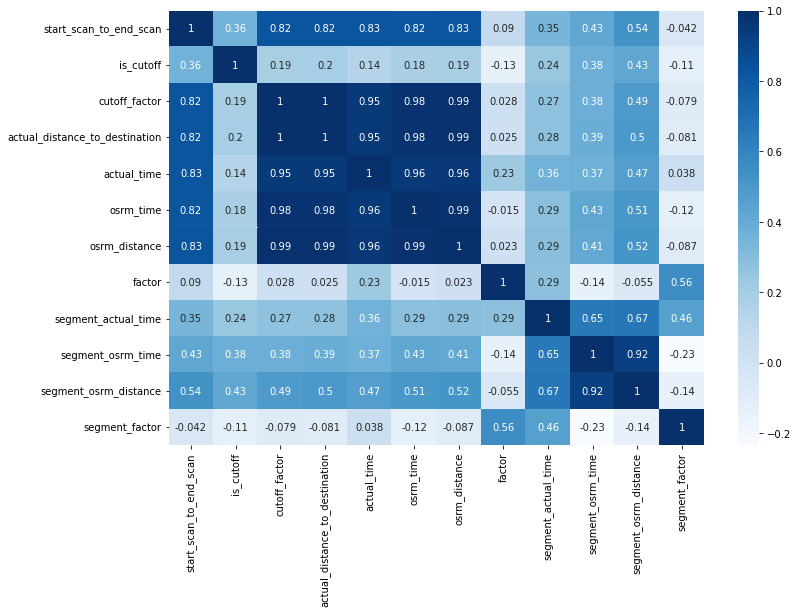

In [113]:
#checking correlation using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(method="spearman"),annot=True, cmap="Blues")
plt.show()

**Observations:**

1. actual time is highly coorelated with start to end time, cutoff factor, actual distance to destination, osrm time and distance.
2. cutoff factor is highly coorelated with actual distance and actual time.
3. Apart from segment factor and factor, all the features are somewhat positive coorelated.
4. segment time and segment distance have weak coorelation with actual time than start to end distance, start to end time, osrm time and cut off factor.

In [114]:
for i in df.columns:
  print(i,":",df[i].nunique())

data : 2
trip_creation_time : 14817
route_schedule_uuid : 1504
route_type : 2
trip_uuid : 14817
source_center : 1508
source_name : 1498
destination_center : 1481
destination_name : 1468
od_start_time : 26369
od_end_time : 26369
start_scan_to_end_scan : 1915
is_cutoff : 2
cutoff_factor : 501
cutoff_timestamp : 93180
actual_distance_to_destination : 144515
actual_time : 3182
osrm_time : 1531
osrm_distance : 138046
factor : 45641
segment_actual_time : 747
segment_osrm_time : 214
segment_osrm_distance : 113799
segment_factor : 5675


In [115]:
# aggregating values based on trip, source center and destination center

df1=df.groupby(["trip_uuid","source_center","destination_center"]).agg({"trip_creation_time":"first","route_type":"first","od_start_time":"first","od_end_time":"first","start_scan_to_end_scan":"first","source_name":"last","destination_name":"last","actual_time":"last","actual_distance_to_destination":"last","osrm_time":"last","osrm_distance":"last","segment_osrm_time":"sum","segment_osrm_distance":"sum","osrm_distance":"last","segment_actual_time":"sum"}).reset_index()
df1.rename({"actual_distance_to_destination":"actual_distance"}, axis=1,inplace=True)

In [116]:
# separating city, state, place from source name
Src=df1["source_name"].str.split("_", expand=True, n=2)
Src

,0,1,2
0,Kanpur,Central,H_6 (Uttar Pradesh)
1,Bhopal,Trnsport,H (Madhya Pradesh)
2,Doddablpur,ChikaDPP,D (Karnataka)
3,Tumkur,Veersagr,I (Karnataka)
4,Gurgaon,Bilaspur,HB (Haryana)
...,...,...,...
26363,Tirchchndr,Shnmgprm,D (Tamil Nadu)
26364,Peikulam,SriVnktpm,D (Tamil Nadu)
26365,Eral,Busstand,D (Tamil Nadu)
26366,Sandur,WrdN1DPP,D (Karnataka)


In [117]:
def checkplace(row):
  row=row.replace(" ","")
  end=row.find("(")
  start=end-1
  value=row[start:end]
  return value

In [118]:
# Extracting features like source city, source place, source city
df1["Src_City"]=Src[0]
df1["Src_Place"]=Src[1]
df1["Src_Code"]=df1["source_name"].apply(lambda i: checkplace(i) if i is not None else None)
df1["Src_State"]=df1["source_name"].apply(lambda i: i[i.find("(")+1:i.find(")")] if i is not None else None)

In [119]:
# separating city, state, place from source name
Dest=df1["destination_name"].str.split("_", expand=True, n=2)
Dest

,0,1,2
0,Gurgaon,Bilaspur,HB (Haryana)
1,Kanpur,Central,H_6 (Uttar Pradesh)
2,Chikblapur,ShntiSgr,D (Karnataka)
3,Doddablpur,ChikaDPP,D (Karnataka)
4,Chandigarh,Mehmdpur,H (Punjab)
...,...,...,...
26363,Thisayanvilai,UdnkdiRD,D (Tamil Nadu)
26364,Tirunelveli,VdkkuSrt,I (Tamil Nadu)
26365,Tirchchndr,Shnmgprm,D (Tamil Nadu)
26366,Bellary,Dc (Karnataka),None


In [120]:
# Extracting features like destination city, destination place, destination city

df1["Dest_City"]=Dest[0]
df1["Dest_Place"]=Dest[1]
df1["Dest_Code"]=df1["destination_name"].apply(lambda i: checkplace(i) if i is not None else None)
df1["Dest_State"]=df1["destination_name"].apply(lambda i: i[i.find("(")+1:i.find(")")] if i is not None else None)

In [121]:
# Extracting day, month, year from trip creation time column

df1["day"]=pd.to_datetime(df1["trip_creation_time"]).dt.day
df1["month"]=pd.to_datetime(df1["trip_creation_time"]).dt.month
df1["year"]=pd.to_datetime(df1["trip_creation_time"]).dt.year

# converting od start and end time from object to datetime datatype
df1["od_start_time"]=pd.to_datetime(df1["od_start_time"])
df1["od_end_time"]=pd.to_datetime(df1["od_end_time"])

In [122]:
# dropping source name, destination name and trip creation time
df1.drop(["source_name","destination_name","trip_creation_time"], axis=1,inplace=True)

In [123]:
# unique values of source states
df1["Src_State"].unique()

array(['Uttar Pradesh', 'Madhya Pradesh', 'Karnataka', 'Haryana',
       'Maharashtra', 'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana',
       'Andhra Pradesh', 'Rajasthan', 'Assam', 'West Bengal', 'Punjab',
       'Chandigarh', 'Goa', 'Uttarakhand', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Himachal Pradesh', 'Kerala', 'Arunachal Pradesh',
       'Bihar', 'Meghalaya', 'Chhattisgarh', 'Jammu & Kashmir',
       'Dadra and Nagar Haveli', 'Mizoram', 'Tripura', 'Nagaland', None],
      dtype=object)

In [124]:
df1["Src_City"].nunique()

1262

In [125]:
df1["Dest_City"].nunique()

1258

In [126]:
# unique values of source states
df1["Dest_State"].unique()

array(['Haryana', 'Uttar Pradesh', 'Karnataka', 'Punjab', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Andhra Pradesh', 'Telangana',
       'Rajasthan', 'Madhya Pradesh', 'Assam', 'West Bengal',
       'Chandigarh', 'Dadra and Nagar Haveli', 'Orissa', 'Uttarakhand',
       'Bihar', 'Jharkhand', 'Pondicherry', 'Goa', 'Himachal Pradesh',
       'Kerala', 'Arunachal Pradesh', 'Mizoram', 'Chhattisgarh',
       'Jammu & Kashmir', 'Meghalaya', 'Nagaland', 'Tripura', None,
       'Daman & Diu'], dtype=object)

In [127]:
df1["Src_City"].value_counts()

Gurgaon         1141
Bengaluru       1136
Bhiwandi         821
Bangalore        792
Mumbai           719
                ... 
Manjeshwar         1
Maharajganj        1
Nirjuli            1
Kothanalloor       1
Kapadvanj          1
Name: Src_City, Length: 1262, dtype: int64

In [128]:
df1["Dest_City"].value_counts()

Bengaluru    1180
Mumbai       1000
Gurgaon       986
Bangalore     683
Hyderabad     643
             ... 
Amalner         1
Parbhani        1
Shivpuri        1
Koraput         1
Lunawada        1
Name: Dest_City, Length: 1258, dtype: int64

In [129]:
# Bengaluru and Bangalore are treated as 2 cities, Bangalore can be replaced with Bengaluru

df1["Dest_City"]=df1["Dest_City"].str.replace("Bangalore","Bengaluru")
df1["Src_City"]=df1["Src_City"].str.replace("Bangalore","Bengaluru")

In [130]:
# checking null values after merging of rows
round((df1.isnull().sum()/len(df1))*100,2)

trip_uuid                 0.00
source_center             0.00
destination_center        0.00
route_type                0.00
od_start_time             0.00
od_end_time               0.00
start_scan_to_end_scan    0.00
actual_time               0.00
actual_distance           0.00
osrm_time                 0.00
osrm_distance             0.00
segment_osrm_time         0.00
segment_osrm_distance     0.00
segment_actual_time       0.00
Src_City                  0.25
Src_Place                 3.38
Src_Code                  0.25
Src_State                 0.25
Dest_City                 0.31
Dest_Place                4.05
Dest_Code                 0.31
Dest_State                0.31
day                       0.00
month                     0.00
year                      0.00
dtype: float64

**Observation:**

1. After aggregating values based on trip, source center and destination center, there are few null values populated.
2. Source city,Source code,Destination city, Destination code have very less null values so these can be dropped.
3. Source place and Destination place have some null values but these can be replaced with source and destination city.
4. Most no of items are being picked up and delivered to metro cities like bengaluru, mumbai, gurgaon, hyderabad

In [131]:
df1.columns

Index(['trip_uuid', 'source_center', 'destination_center', 'route_type',
       'od_start_time', 'od_end_time', 'start_scan_to_end_scan', 'actual_time',
       'actual_distance', 'osrm_time', 'osrm_distance', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_actual_time', 'Src_City', 'Src_Place',
       'Src_Code', 'Src_State', 'Dest_City', 'Dest_Place', 'Dest_Code',
       'Dest_State', 'day', 'month', 'year'],
      dtype='object')

In [132]:
# Handling missing values

df1.dropna(subset=["Src_City","Dest_City","Src_Code","Src_State","Dest_Code","Dest_State"],axis=0,inplace=True)

df1["Src_Place"].fillna(df1["Src_City"], inplace=True)
df1["Dest_Place"].fillna(df1["Dest_City"], inplace=True)

In [133]:
round((df1.isnull().sum()/len(df1))*100,2)

trip_uuid                 0.0
source_center             0.0
destination_center        0.0
route_type                0.0
od_start_time             0.0
od_end_time               0.0
start_scan_to_end_scan    0.0
actual_time               0.0
actual_distance           0.0
osrm_time                 0.0
osrm_distance             0.0
segment_osrm_time         0.0
segment_osrm_distance     0.0
segment_actual_time       0.0
Src_City                  0.0
Src_Place                 0.0
Src_Code                  0.0
Src_State                 0.0
Dest_City                 0.0
Dest_Place                0.0
Dest_Code                 0.0
Dest_State                0.0
day                       0.0
month                     0.0
year                      0.0
dtype: float64

**Univariate Analysis**

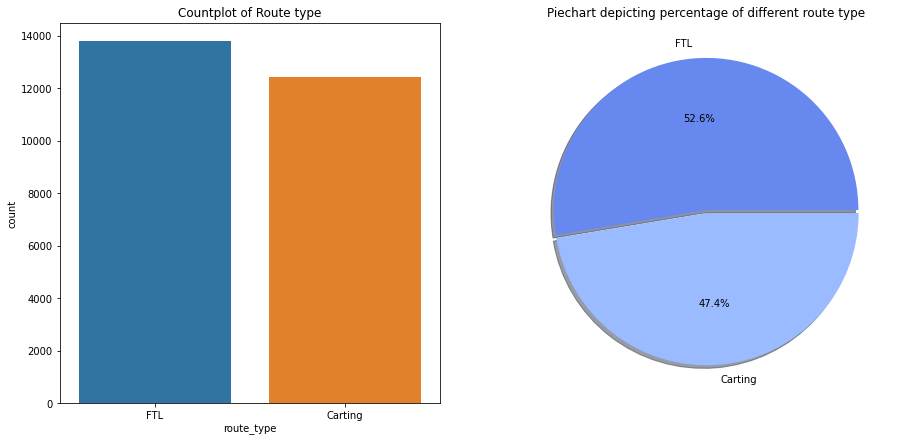

In [134]:
# countplot and pie chart for categorical variable route type

plt.figure(figsize=(15,7))
colors=sns.color_palette("coolwarm")
plt.subplot(1,2,1)
sns.countplot(x="route_type",data=df1)
plt.title("Countplot of Route type")

plt.subplot(1,2,2)
plt.pie(df1["route_type"].value_counts(), labels=df1["route_type"].value_counts().index, autopct="%0.1f%%", explode=[0.02,0], shadow=True,colors=colors)
plt.title("Piechart depicting percentage of different route type")
plt.show()

In [ ]:
# Distribution plot for all numerical features

continuous_var=list(df1.dtypes[df1.dtypes=="float64"].index)
plt.figure(figsize=(20,17))
for i in range(len(continuous_var)):
  plt.subplot(3,3,i+1)
  sns.distplot(df1[continuous_var[i]],hist=True, kde=True, hist_kws={"edgecolor":"black"}, kde_kws={"linewidth":2}, color="red")
  plt.title("Distribution plot for "+str(continuous_var[i]))
plt.show()
  
# output is hidden due to organization policy and to manitain confidentiality

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

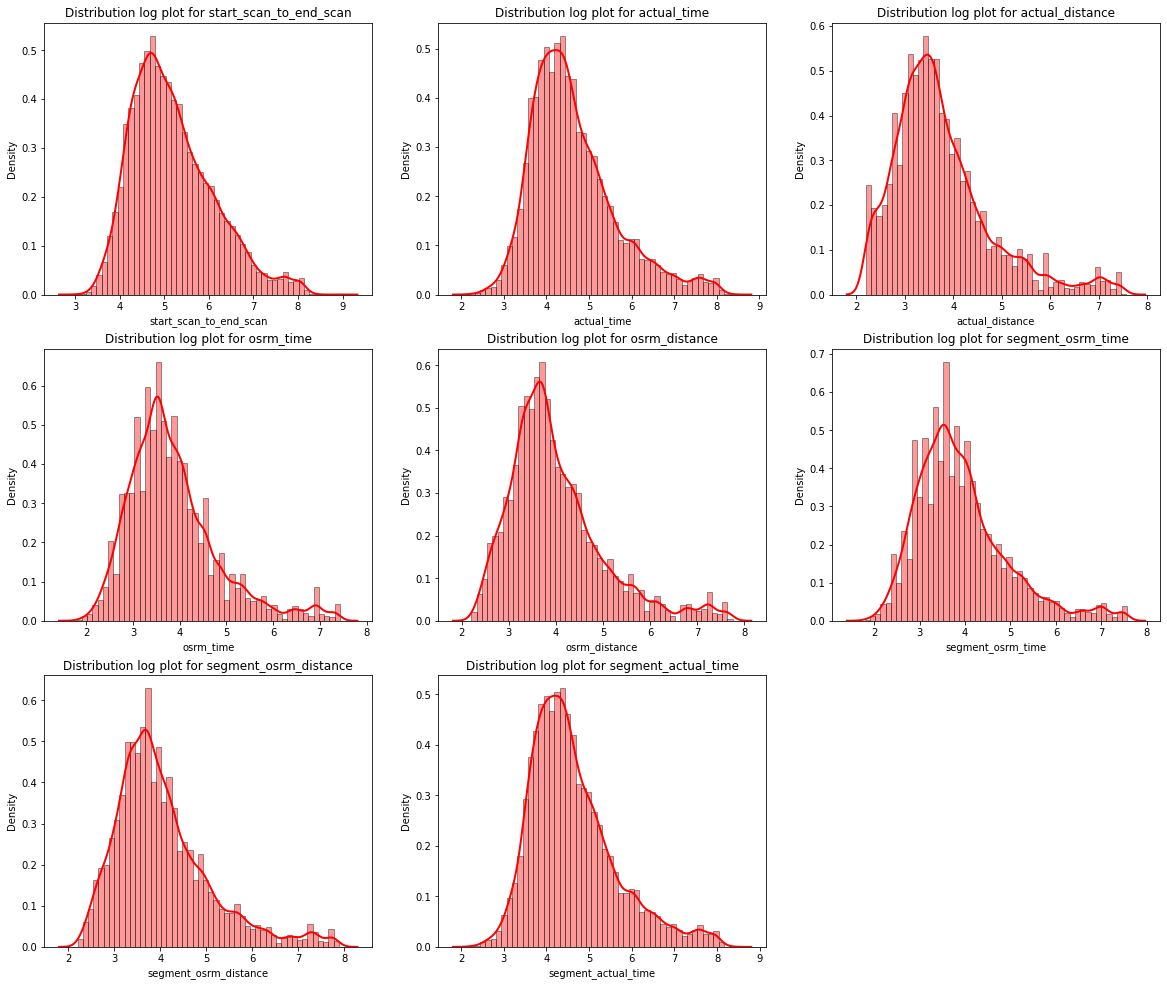

In [136]:
# Distribution of log normal plot for numerical features

plt.figure(figsize=(20,17))
for i in range(len(continuous_var)):
  plt.subplot(3,3,i+1)
  sns.distplot(np.log(df1[continuous_var[i]]),hist=True, kde=True, hist_kws={"edgecolor":"black"}, kde_kws={"linewidth":2}, color="red")
  plt.title("Distribution log plot for "+str(continuous_var[i]))
plt.show()

In [ ]:
# Boxplot for numerical features

continuous_var=list(df1.dtypes[df1.dtypes=="float64"].index)
plt.figure(figsize=(20,17))
for i in range(len(continuous_var)):
  plt.subplot(3,3,i+1)
  sns.boxplot(x=continuous_var[i], data=df1)
  plt.title("Boxplot for "+str(continuous_var[i]))
plt.show()
  
# output is hidden due to organization policy and to manitain confidentiality

**Observations:**

1. Numerical features like actual  and segment time, actual and segment distance are following right skewed log normal distributions.
2. All the numerical features have some outliers which should be handled.

In [ ]:
# finding min and max values for outliers detection using quartile and IQR method for continuous variables

continuous_var=list(df1.dtypes[df1.dtypes=="float64"].index)

def outliers_min_max_value(df1, col):
  quartiles=np.percentile(df1[col].values,np.arange(0,100,25))
  IQR=round((quartiles[3]-quartiles[1]),2)
  print("Inter Quartile Range for "+ str(col) + ":", IQR)
  min_value=round(quartiles[1] - (1.5 *IQR),2)
  max_value=round(quartiles[3] + (1.5 *IQR),2)

  print("min value for "+ str(col)+":",min_value)
  print("max value for "+ str(col)+":",max_value)


for i in continuous_var:
  outliers_min_max_value(df1,i)
  print("*"*50)
# output is hidden due to organization policy and to manitain confidentiality

In [139]:
print("percentage of outliers for start_scan_to_end_scan:",round(((len(df1[df1["start_scan_to_end_scan"]>631]) * 100 )/len(df1)),2),"%")
print("percentage of outliers for actual_time:",round(((len(df1[df1["actual_time"]>343.5]) * 100 )/len(df1)),2),"%")
print("percentage of outliers for actual_distance:",round(((len(df1[df1["actual_distance"]>131.86]) * 100 )/len(df1)),2),"%")
print("percentage of outliers for osrm_time:",round(((len(df1[df1["osrm_time"]>142.5]) * 100 )/len(df1)),2),"%")
print("percentage of outliers for segment_osrm_time:",round(((len(df1[df1["segment_osrm_time"]>160]) * 100 )/len(df1)),2),"%")
print("percentage of outliers for segment_osrm_distance:",round(((len(df1[df1["segment_osrm_distance"]>185.67]) * 100 )/len(df1)),2),"%")
print("percentage of outliers for osrm_distance:",round(((len(df1[df1["osrm_distance"]>172.27]) * 100 )/len(df1)),2),"%")
print("percentage of outliers for segment_actual_time:",round(((len(df1[df1["segment_actual_time"]>340]) * 100 )/len(df1)),2),"%")

percentage of outliers for start_scan_to_end_scan: 10.36 %
percentage of outliers for actual_time: 11.97 %
percentage of outliers for actual_distance: 12.47 %
percentage of outliers for osrm_time: 11.08 %
percentage of outliers for segment_osrm_time: 11.97 %
percentage of outliers for segment_osrm_distance: 11.76 %
percentage of outliers for osrm_distance: 11.73 %
percentage of outliers for segment_actual_time: 11.98 %


In [140]:
# As numerical variables have more than 10% outliers so clipping it between 5 and 95 percentile instead of removing it

continuous_var=list(df1.dtypes[df1.dtypes=="float64"].index)
df1_copy=df1.copy()
for col in continuous_var:
    percentiles = df1[col].quantile([0.05,0.95]).values
    df1_copy[col] = np.clip(df1_copy[col], percentiles[0], percentiles[1])

**Bivariate Analysis**

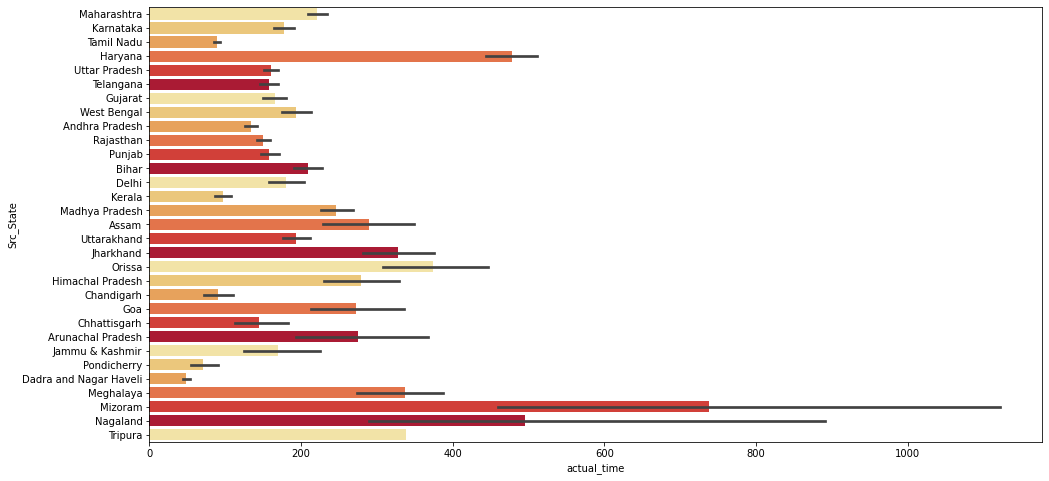

In [191]:
# Visualization for newly created feature source state and actual time

plt.figure(figsize=(16,8))
colors=sns.color_palette("YlOrRd")
sns.barplot(x="actual_time",y="Src_State", data=df1, order=df1["Src_State"].value_counts().index,palette=colors)
plt.show()

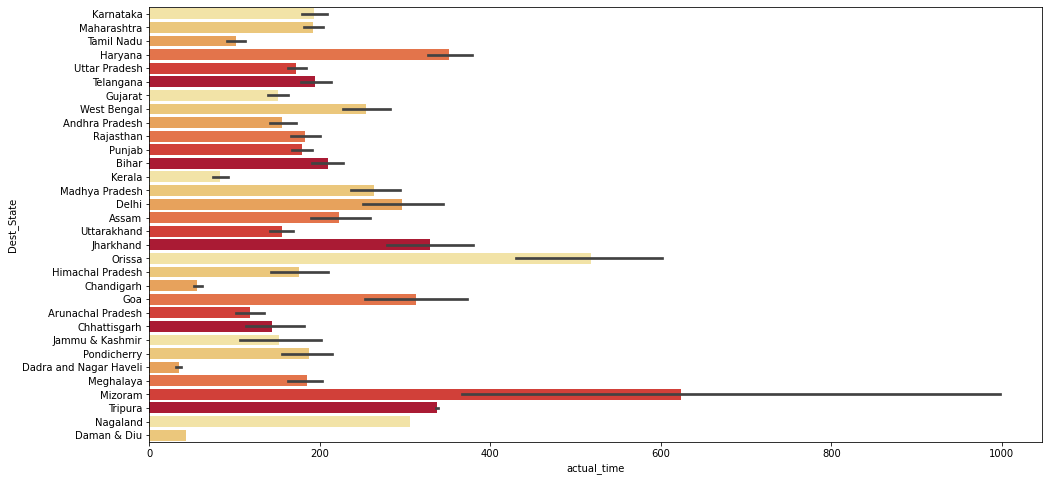

In [193]:
# Visualization for newly created feature destination state and actual time

plt.figure(figsize=(16,8))
colors=sns.color_palette("YlOrRd")
sns.barplot(x="actual_time",y="Dest_State", data=df1, order=df1["Dest_State"].value_counts().index, palette=colors)
plt.show()

In [ ]:
# Boxplot for actual time and route type

plt.figure(figsize=(10,7))
sns.boxplot(x="actual_time",y="route_type", data=df1)
plt.show()

# output is hidden due to organization policy and to manitain confidentiality

In [ ]:
# Boxplot for actual distance and route type

plt.figure(figsize=(10,7))
sns.boxplot(x="actual_distance",y="route_type", data=df1)
plt.show()

# output is hidden due to organization policy and to manitain confidentiality

When distance is more between source and destination, FTL is more frequently used for delivery 

**Comparison on Distance and Time**

In [ ]:
# Analysis on actual time based on city
temp=df1.groupby(["Src_City","Dest_City"]).agg({"actual_distance":"mean","actual_time":"mean"}).reset_index().sort_values("actual_distance")
temp

# output is hidden due to organization policy and to manitain confidentiality

In [ ]:
# scatterplot for actual distance and actual time based on cities
plt.figure(figsize=(10,7))
sns.scatterplot(x="actual_distance", y="actual_time", data=temp)
plt.title("scatterplot for actual distance and actual time")
plt.show()

# output is hidden due to organization policy and to manitain confidentiality

In [ ]:
# Analysis on actual distance and time based on states
temp=df1.groupby(["Src_State","Dest_State"]).agg({"actual_distance":"mean","actual_time":"mean"}).reset_index().sort_values("actual_distance")
temp

# output is hidden due to organization policy and to manitain confidentiality

In [ ]:
# scatterplot for actual distance and actual time based on states
plt.figure(figsize=(10,7))
sns.scatterplot(x="actual_distance", y="actual_time", data=temp)
plt.title("scatterplot for actual distance and actual time")
plt.show()

# output is hidden due to organization policy and to manitain confidentiality

In [149]:
temp=df1.groupby(["Src_State","Dest_State"]).agg({"osrm_time":"mean","osrm_distance":"mean"}).reset_index().sort_values("osrm_distance")
temp

# output is hidden due to organization policy and to manitain confidentiality

,Src_State,Dest_State,osrm_time,osrm_distance
32,Gujarat,Daman & Diu,11.000000,10.292100
18,Chandigarh,Chandigarh,14.615385,14.791408
21,Dadra and Nagar Haveli,Gujarat,13.600000,15.748120
31,Gujarat,Dadra and Nagar Haveli,13.588235,15.949929
23,Delhi,Delhi,19.594470,18.258636
...,...,...,...,...
101,Maharashtra,West Bengal,1382.222222,1933.378600
47,Haryana,Karnataka,1508.409091,2063.971682
71,Karnataka,Haryana,1527.800000,2072.981998
53,Haryana,Tamil Nadu,1610.357143,2190.494436


In [ ]:
# scatterplot for actual distance and actual time based on states
plt.figure(figsize=(10,7))
sns.scatterplot(x="osrm_distance", y="osrm_time", data=temp)
plt.title("scatterplot for osrm distance and osrm time")
plt.show()

# output is hidden due to organization policy and to manitain confidentiality

In [151]:
temp=df1.groupby(["Src_City","Dest_City"]).agg({"osrm_time":"mean","osrm_distance":"mean"}).reset_index().sort_values("osrm_distance")
temp

,Src_City,Dest_City,osrm_time,osrm_distance
349,Bhubaneshwar,Bhubaneshwar,7.000000,10.197450
82,Anand,Anand,12.000000,10.257200
2270,Vapi,Daman,11.000000,10.292100
2280,Varanasi,Varanasi (Uttar Pradesh),8.000000,10.718600
1797,Pune,PNQ Pashan DPC (Maharashtra),12.292683,10.820729
...,...,...,...,...
325,Bhiwandi,Kolkata,1382.222222,1933.378600
798,Gurgaon,Bengaluru,1508.409091,2063.971682
247,Bengaluru,Gurgaon,1527.800000,2072.981998
822,Gurgaon,MAA,1610.357143,2190.494436


In [ ]:
# scatterplot for actual distance and actual time based on states
plt.figure(figsize=(10,7))
sns.scatterplot(x="osrm_distance", y="osrm_time", data=temp)
plt.title("scatterplot for osrm distance and osrm time")
plt.show()

# output is hidden due to organization policy and to manitain confidentiality

In [ ]:
# analyzing segments for source and destination states

temp=df.groupby(["trip_uuid","source_name","destination_name"]).agg({"segment_osrm_distance":"count","actual_distance_to_destination":"last", "cutoff_factor":"last","actual_time":"last"}).reset_index().sort_values("segment_osrm_distance", ascending=False)
temp.rename({"segment_osrm_distance":"Total_segments","actual_distance_to_destination":"actual_distance"}, axis=1, inplace=True)
temp["source_state"]=temp["source_name"].apply(lambda i: i[i.find("(")+1:i.find(")")] if i is not None else None)
temp["destination_state"]=temp["destination_name"].apply(lambda i: i[i.find("(")+1:i.find(")")] if i is not None else None)
temp
# output is hidden due to organization policy and to manitain confidentiality

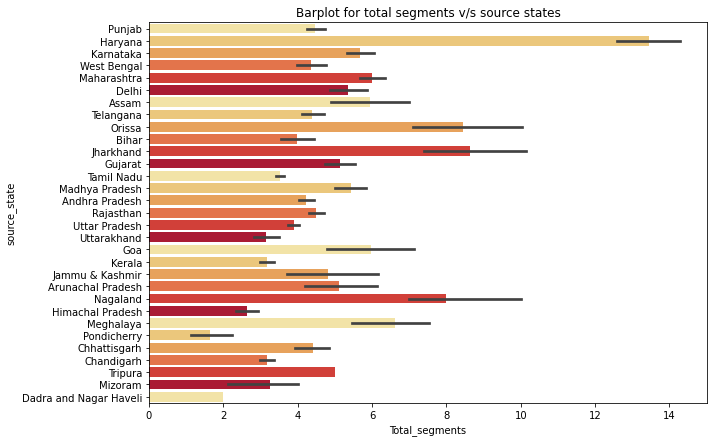

In [194]:
plt.figure(figsize=(10,7))
colors=sns.color_palette("YlOrRd")
sns.barplot(x="Total_segments",y="source_state", data=temp,palette=colors)
plt.title("Barplot for total segments v/s source states")
plt.show()

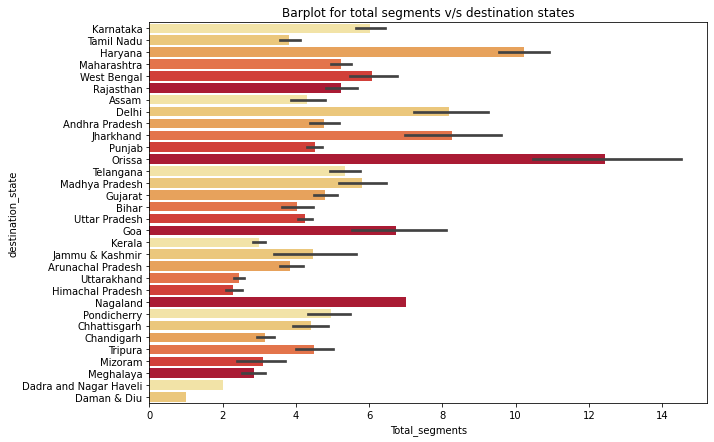

In [195]:
plt.figure(figsize=(10,7))
colors=sns.color_palette("YlOrRd")
sns.barplot(x="Total_segments",y="destination_state", data=temp,palette=colors)
plt.title("Barplot for total segments v/s destination states")
plt.show()

In [ ]:
# scatterplot for cutoff factor v/s actual time
plt.figure(figsize=(10,7))
sns.scatterplot(x="cutoff_factor", y="actual_time",data=temp)
plt.title("scatterplot for cutoff factor v/s actual time")
plt.show()
# output is hidden due to organization policy and to manitain confidentiality

In [ ]:
sns.pairplot(df1.select_dtypes(include="float64"))
# output is hidden due to organization policy and to manitain confidentiality

**Observations:**

1. Items which are delivered in the same city or which city are closer have less actual time.
2. Items which are delivered from west bengal to maharashtra, assam to delhi, punjab to karnataka are taking max time to deliver.
3. Even though, with increasing distance actual time is increasing but the same pattern is not followed for few cities and states where distance between source and destination is less but duration between the states is more compared to states where distance between source and destination is more.
4. osrm time is linearly increasing with increase in osrm distance but same is not observed for actual distance and time.
5. The most segments are allocated to items that are delivered to far-off states, such as punjab to karnataka, followed by haryana and tamil nadu.
6. Cutoff factor is proportional to distance hence impacting actual time.

In [158]:
df1["route_type"].value_counts()

FTL        13798
Carting    12424
Name: route_type, dtype: int64

## **Hypothesis Testing**

## **1. Prove (or disprove) that the avg. time to deliver via Truck Load is greater than Carting?**

### Step1: Define Null and Alternate Hypothesis.

H0: Actual mean time for Carting and FTL is same.

Ha: Actual mean time for FTL is greater than Carting.

Let 𝜇1 and 𝜇2 be the average time to deliver via FTL and Carting respectively.

Mathematically, above formaulated hypothesis can be written as:

H0: 𝜇1 = 𝜇2

Ha: 𝜇1 > 𝜇2

### Step2: Select Appropriate Test

In [159]:
FTL_actualtime=df1[df1["route_type"]=="FTL"]["actual_time"].sample(5000)
Carting_actualtime=df1[df1["route_type"]=="Carting"]["actual_time"].sample(5000)

In [160]:
print("Sample standard deviation for actual time in FTL",round(FTL_actualtime.std(),2))
print("Sample standard deviation for actual time in Carting",round(Carting_actualtime.std(),2))

Sample standard deviation for actual time in FTL 484.67
Sample standard deviation for actual time in Carting 103.9


As Sample standard deviation are different, population standard deviation can be different. As population standard deviation is unknown, 2 sample independent t-test would be appropriate.

### Step3: Selecting Significance Level

Selecting alpha as 0.05

In [161]:
alpha=0.05

### Step4: Calculating p-Value

In [162]:
ttest_statistic,p_value=ttest_ind(FTL_actualtime,Carting_actualtime, equal_var=False, alternative="greater")

print("ttest_statistic:",ttest_statistic)
print("p value:",p_value)

print("*"*50)

if (p_value>alpha):
  print("As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.")
else:
  print("As p value is less than significance value,reject null hypothesis")

ttest_statistic: 29.076991265642164
p value: 3.0229185325491953e-173
**************************************************
As p value is less than significance value,reject null hypothesis


**Conclusion:**

Since p value is less than 5% significance value, we are rejecting null hypothesis. Hence we have enough statistical evidence to prove that avg time taken to deliver via FTL is greater when delivered via Carting.

## **2. Prove if start_end_time and start_scan_to_end_scan time are significant different.**

T-Test and KS Test can be used to compare 2 samples.

In [163]:
# extracting feature for time taken between od_start_time and od_end_time
df1["diff_start_end_time"]=round((df1["od_end_time"]-df1["od_start_time"]) / np.timedelta64(1,"m"),2)
df1["diff_start_end_time"]

0        1260.60
1         999.51
2          58.83
3         122.78
4         834.64
          ...   
26363      62.12
26364      91.09
26365      44.17
26366     287.47
26367      66.93
Name: diff_start_end_time, Length: 26222, dtype: float64

### **1. T-Test**

### Step1: Define Null and Alternate Hypothesis.

H0: start_end_time and start_scan_to_end_scan time are same.

Ha: start_end_time and start_scan_to_end_scan time are different.

### Step2: Selecting Significance Level

Selecting alpha as 0.05

In [164]:
alpha=0.05

### Step3: Calculating p-Value

In [165]:
ttest_statistic,p_value=ttest_ind(df1["diff_start_end_time"],df1["start_scan_to_end_scan"])

print("ttest_statistic:",ttest_statistic)
print("p value:",p_value)

print("*"*50)

if (p_value>alpha):
  print("As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.")
else:
  print("As p value is less than significance value,reject null hypothesis")

ttest_statistic: 0.12946380773344773
p value: 0.8969911576521526
**************************************************
As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.


**Conclusion:**

Since p value is greater than 5% significance value, we failed to reject null hypothesis. Hence we have enough statistical evidence to prove that start_end_time and start_scan_to_end_scan time are same.

### **2. KS Test**

### Step1: Define Null and Alternate Hypothesis.

H0: Distribution of start_end_time and start_scan_to_end_scan time are similar.

Ha: Distribution of start_end_time and start_scan_to_end_scan time are different.



### Step2: Selecting Significance Level

Selecting alpha as 0.05

In [166]:
alpha=0.05

### Step3: Calculating p-Value

In [167]:
kstest_statistic,p_value=kstest(df1["diff_start_end_time"],df1["start_scan_to_end_scan"])

print("kstest_statistic:",kstest_statistic)
print("p value:",p_value)

print("*"*50)

if (p_value>alpha):
  print("As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.")
else:
  print("As p value is less than significance value,reject null hypothesis")

kstest_statistic: 0.006902600869498898
p value: 0.5575053318743617
**************************************************
As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.


**Conclusion:**

Since p value is greater than 5% significance value, we failed to reject null hypothesis. Hence we have enough statistical evidence to prove that distribution of start_end_time and start_scan_to_end_scan time are same.

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(x=df1["diff_start_end_time"],hist=True, kde_kws={"linewidth":3}, hist_kws={"edgecolor":"black"})
plt.title("Distribution plot for diff_start_end_time")

plt.subplot(1,2,2)
sns.distplot(x=df1["start_scan_to_end_scan"],hist=True, kde_kws={"linewidth":3}, hist_kws={"edgecolor":"black"})
plt.title("Distribution plot for start_scan_to_end_scan")
plt.show()
# output is hidden due to organization policy and to manitain confidentiality

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="diff_start_end_time",y="start_scan_to_end_scan",data=df1)
plt.title("Scatter plot for diff_start_end_time and start_scan_to_end_scan")
plt.show()
# output is hidden due to organization policy and to manitain confidentiality

### **3. Prove or Disprove mean of osrm and actual time are significant different.**

In [170]:
# aggregating values based on trip

df2=df.groupby(["trip_uuid"]).agg({"source_center":"first","destination_center":"first","trip_creation_time":"first","route_type":"first","od_start_time":"first","od_end_time":"first","start_scan_to_end_scan":"first","source_name":"last","destination_name":"last","actual_time":"last","actual_distance_to_destination":"last","osrm_time":"last","segment_osrm_time":"sum","segment_osrm_distance":"sum","osrm_distance":"last","segment_actual_time":"sum"}).reset_index()
df2.rename({"actual_distance_to_destination":"actual_distance"}, axis=1,inplace=True)
df2.head()

,trip_uuid,source_center,destination_center,trip_creation_time,route_type,od_start_time,od_end_time,start_scan_to_end_scan,source_name,destination_name,actual_time,actual_distance,osrm_time,segment_osrm_time,segment_osrm_distance,osrm_distance,segment_actual_time
0,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,FTL,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),732.0,383.759164,329.0,1008.0,1320.4733,446.5496,1548.0
1,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,Carting,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),47.0,24.644021,26.0,65.0,84.1894,28.1994,141.0
2,trip-153671043369099517,IND562132AAA,IND000000ACB,2018-09-12 00:00:33.691250,FTL,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),611.0,237.439610,212.0,1941.0,2545.2678,281.2109,3308.0
3,trip-153671046011330457,IND400072AAB,IND401104AAA,2018-09-12 00:01:00.113710,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),59.0,17.175274,15.0,16.0,19.8766,19.6800,59.0
4,trip-153671052974046625,IND583101AAA,IND583201AAA,2018-09-12 00:02:09.740725,FTL,2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,152.0,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),131.0,41.317614,44.0,115.0,146.7919,53.5761,340.0


### Step1: Define Null and Alternate Hypothesis.

H0: mean of osrm and actual time are equal.

Ha: mean of osrm time is greater than actual time.

### Step2: Selecting Significance Level

Selecting alpha as 0.05

In [171]:
alpha=0.05

### Step3: Calculating p-Value

In [173]:
ttest_statistic,p_value=ttest_ind(df2["osrm_time"].sample(2999),df2["actual_time"].sample(2999), alternative="greater")

print("ttest_statistic:",ttest_statistic)
print("p value:",p_value)

print("*"*50)

if (p_value>alpha):
  print("As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.")
else:
  print("As p value is less than significance value,reject null hypothesis")

ttest_statistic: -15.189088620191052
p value: 1.0
**************************************************
As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.


**Conclusion:**

Since p value is greater than 5% significance value, we failed to reject null hypothesis. Hence we have enough statistical evidence to prove that mean of osrm and actual time are equal.

### **2. KS Test**

### Step1: Define Null and Alternate Hypothesis.

H0: Distribution of osrm and actual time are similar.

Ha: Distribution of osrm and actual time are not similar.

### Step2: Selecting Significance Level

Selecting alpha as 0.05

In [174]:
alpha=0.05

### Step3: Calculating p-Value

In [175]:
kstest_statistic,p_value=kstest(df2["osrm_time"],df2["actual_time"])

print("kstest_statistic:",kstest_statistic)
print("p value:",p_value)

print("*"*50)

if (p_value>alpha):
  print("As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.")
else:
  print("As p value is less than significance value,reject null hypothesis")

kstest_statistic: 0.3679557265303368
p value: 0.0
**************************************************
As p value is less than significance value,reject null hypothesis


**Conclusion:**

Since p value is less than 5% significance value, we reject null hypothesis. Hence we dont have enough statistical evidence to prove that distribution of osrm_time and actual_time are same.

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(x=df2["osrm_time"],hist=True, kde_kws={"linewidth":3}, hist_kws={"edgecolor":"black"})
plt.title("Distribution plot for osrm_time")

plt.subplot(1,2,2)
sns.distplot(x=df2["actual_time"],hist=True, kde_kws={"linewidth":3}, hist_kws={"edgecolor":"black"})
plt.title("Distribution plot for actual_time")
plt.show()
# output is hidden due to organization policy and to manitain confidentiality

## **4. Prove or Disprove mean of osrm and actual distance are significant different.**

### **1. T-Test**

### Step1: Define Null and Alternate Hypothesis.

H0: mean of osrm and actual distance are equal.

Ha: mean of actual distance is greater than osrm time.

### Step2: Selecting Significance Level

Selecting alpha as 0.05

In [177]:
alpha=0.05

### Step3: Calculating p-Value

In [178]:
ttest_statistic,p_value=ttest_ind(df2["actual_distance"].sample(2999),df2["osrm_distance"].sample(2999), alternative="greater")

print("ttest_statistic:",ttest_statistic)
print("p value:",p_value)

print("*"*50)

if (p_value>alpha):
  print("As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.")
else:
  print("As p value is less than significance value,reject null hypothesis")

ttest_statistic: -4.497937181544769
p value: 0.9999965045042503
**************************************************
As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.


**Conclusion:**

Since p value is greater than 5% significance value, we failed to reject null hypothesis. Hence we have enough statistical evidence to prove that mean of osrm and actual distance are equal.

### **2. KS Test**

### Step1: Define Null and Alternate Hypothesis.

H0: Distribution of osrm and actual distance are similar.

Ha: Distribution of osrm and actual distance are not similar.

### Step2: Selecting Significance Level

Selecting alpha as 0.05

In [179]:
alpha=0.05

### Step3: Calculating p-Value

In [180]:
kstest_statistic,p_value=kstest(df2["actual_distance"],df2["osrm_distance"])

print("kstest_statistic:",kstest_statistic)
print("p value:",p_value)

print("*"*50)

if (p_value>alpha):
  print("As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.")
else:
  print("As p value is less than significance value,reject null hypothesis")

kstest_statistic: 0.13201052844705408
p value: 4.9536633582434495e-113
**************************************************
As p value is less than significance value,reject null hypothesis


**Conclusion:**

Since p value is less than 5% significance value, we reject null hypothesis. Hence we dont have enough statistical evidence to prove that distribution of osrm and actual distance are same.

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(x=df2["osrm_distance"],hist=True, kde_kws={"linewidth":3}, hist_kws={"edgecolor":"black"})
plt.title("Distribution plot for osrm_distance")

plt.subplot(1,2,2)
sns.distplot(x=df2["actual_distance"],hist=True, kde_kws={"linewidth":3}, hist_kws={"edgecolor":"black"})
plt.title("Distribution plot for actual_distance")
plt.show()
# output is hidden due to organization policy and to manitain confidentiality

In [182]:
# converting categorical variable route type using one hot coding

encoder = OneHotEncoder(sparse=False)
ohe= pd.DataFrame(encoder.fit_transform(df1[["route_type"]]))

df1=df1.join(ohe)
df1.rename({0:"routetype_Carting",1:"routetype_FTL"}, axis=1, inplace=True)
df1.drop(["route_type"], axis=1, inplace=True)

In [183]:
# converting categorical variable source state using one hot coding

encoder = OneHotEncoder(sparse=False)
ohe= pd.DataFrame(encoder.fit_transform(df1[["Src_State"]]))

df1=df1.join(ohe)

In [184]:
# Column standardization for numerical features

stdscaler = StandardScaler()
continuous_var=list(df1.dtypes[df1.dtypes=="float64"].index) + list(df1.dtypes[df1.dtypes=="int64"].index)
std_data = stdscaler.fit_transform(df1[continuous_var])
std_data = pd.DataFrame(std_data, columns=continuous_var)
std_data.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,start_scan_to_end_scan,actual_time,actual_distance,osrm_time,osrm_distance,segment_osrm_time,segment_osrm_distance,segment_actual_time,diff_start_end_time,routetype_Carting,...,24,25,26,27,28,29,30,day,month,year
0,2.179615,1.376824,1.387132,1.283824,1.303247,1.999119,1.901293,1.384047,2.179847,-0.949137,...,-0.21538,-0.2971,-0.243715,-0.006193,3.660420,-0.119313,-0.234756,-0.810988,-0.370697,0.0
1,1.587924,1.630892,1.659649,1.601797,1.689429,1.721596,1.828847,1.624794,1.587951,-0.949137,...,-0.21538,-0.2971,-0.243715,-0.006193,-0.273193,-0.119313,-0.234756,-0.810988,-0.370697,0.0
2,-0.545338,-0.399059,-0.323361,-0.349151,-0.341071,-0.350573,-0.339727,-0.400624,-0.544588,1.053589,...,-0.21538,-0.2971,-0.243715,-0.006193,-0.273193,-0.119313,-0.234756,-0.810988,-0.370697,0.0
3,-0.400249,-0.272025,-0.209529,-0.262922,-0.228219,-0.290443,-0.242783,-0.272399,-0.399612,1.053589,...,-0.21538,-0.2971,-0.243715,-0.006193,-0.273193,-0.119313,-0.234756,-0.810988,-0.370697,0.0
4,1.213866,1.063128,0.690201,0.653269,0.653386,0.597629,0.670308,1.070029,1.214188,-0.949137,...,-0.21538,-0.2971,-0.243715,-0.006193,-0.273193,-0.119313,-0.234756,-0.810988,-0.370697,0.0


**Insights:**

1. There are around 1200 different cities where packages are picked up and delivered, with metropolises being the most common places like bengaluru, mumbai, delhi.
2. Full truck loads take less time to transport, but they are only utilised when the destination is far away. By contrast, carting is employed when things are picked up and delivered to nearby locations.
3. Since items delivered in the same city or in a nearby city take less time overall, distance and time are linearly related, although this is not always the case.
4. Due to the great distance between the source and the destination, deliveries from West Bengal to Maharashtra, Assam to Delhi, and Punjab to Karnataka take the longest to complete.
4. Although real time does increase with distance, this trend is not always true for some cities and states where the distance between the source and the destination is smaller but the duration is longer than in states where the distance is larger.
5. Osrm time, which is determined by using the shortest path, increases linearly as osrm distance increases, although real distance and time do not follow this pattern.
6. The longest delivery time between chandigarh and Bangalore is 1927 minutes, covering a distance of 3784 kilometres, while the shortest delivery time is 60 minutes, covering a distance of 9 kilometres from Salem.

**Recommendations:**

1. The segment's real time and its computed time utilising the shortest path differ significantly. In light of this, Total Actual Time exceeds Total Calculated Time. For distance, the same pattern is seen. To more accurately anticipate real time, osrm distance and time can be enhanced.
2. Even though carting only takes a short amount of time, it won't be practicable for long distances, therefore distant sites can be separated into more manageable portions so that a full truck load can be used to accelerate delivery.
3. The most segments are allocated to items that are delivered to far-off states, such as punjab to karnataka, followed by haryana and tamil nadu. Delivery time can be shortened if these segments number can be decreased.